In [1]:
from ExtractData4rmCSV import ExtractData4rmCSV
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Functions import SegmentRuns, PlotDeclSpdOverlay, BuildRunsDict, WorkOutFgi
import math
from scipy.signal import butter, lfilter, freqz, sosfilt


In [2]:
Pzz_csvfilepath = 'CarData/Car_Pzz.csv'
Pzz_df = ExtractData4rmCSV(Pzz_csvfilepath)

content consists of 46648 rows and 45 columns
dataFrame shape: 46646 by 45 (rows by columns)

These are the signals found in the csv file

['Time', 'BrakePressure', 'BrakeSwitchStatus', 'DirectionIndication', 'EngineSpeed', 'GearPosActual', 'GearPosTarget', 'LateralAcceleration', 'PedalPos', 'PwrTrnTorqAct', 'RackPosition', 'ReversedGear', 'SteeringWheelAngle', 'TCMPositionDisplay', 'TorsionBarTorque', 'TorsionBarTorqueSign', 'VehMovementDirection', 'VehicleSpeed', 'YawRate', 'AD_AutonomousMode', 'AD_AxActivation_Req', 'AD_ETSPosActActivation', 'AD_SteeringActivationReq', 'TransIPSpeed', 'TransOPSpeed', 'AccelX', 'AccelY', 'AccelZ', 'AngAccelX', 'AngAccelY', 'AngAccelZ', 'AngRateX', 'AngRateY', 'AngRateZ', 'AngleSlip', 'AngleTrack', 'IsoPitchAngle', 'IsoRollAngle', 'IsoYawAngle', 'PosLat', 'PosLon', 'RoadCurvature', 'VelForward', 'VelLateral', '']

 The test ran for 466 seconds, which is 0 hours, 07 minutes, and 46 seconds!

<class 'pandas.core.frame.DataFrame'>


In [3]:
Xtp_csvfilepath = 'CarData/Car_Xtp.csv'
Xtp_df = ExtractData4rmCSV(Xtp_csvfilepath)

content consists of 43783 rows and 45 columns
dataFrame shape: 43781 by 45 (rows by columns)

These are the signals found in the csv file

['Time', 'BrakePressure', 'BrakeSwitchStatus', 'DirectionIndication', 'EngineSpeed', 'GearPosActual', 'GearPosTarget', 'LateralAcceleration', 'PedalPos', 'PwrTrnTorqAct', 'RackPosition', 'ReversedGear', 'SteeringWheelAngle', 'TCMPositionDisplay', 'TorsionBarTorque', 'TorsionBarTorqueSign', 'VehMovementDirection', 'VehicleSpeed', 'YawRate', 'AD_AutonomousMode', 'AD_AxActivation_Req', 'AD_ETSPosActActivation', 'AD_SteeringActivationReq', 'TransIPSpeed', 'TransOPSpeed', 'AccelX', 'AccelY', 'AccelZ', 'AngAccelX', 'AngAccelY', 'AngAccelZ', 'AngRateX', 'AngRateY', 'AngRateZ', 'AngleSlip', 'AngleTrack', 'IsoPitchAngle', 'IsoRollAngle', 'IsoYawAngle', 'PosLat', 'PosLon', 'RoadCurvature', 'VelForward', 'VelLateral', '']

 The test ran for 437 seconds, which is 0 hours, 07 minutes, and 18 seconds!

<class 'pandas.core.frame.DataFrame'>


# Plot the speed profiles for the two cars

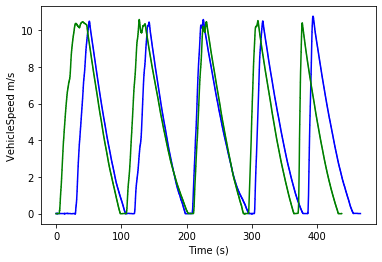

In [4]:
plt.plot(Pzz_df['Time'],Pzz_df['VelForward'],color='b')
plt.plot(Xtp_df['Time'],Xtp_df['VelForward'],color='g')

plt.xlabel('Time (s)')
plt.ylabel('VehicleSpeed m/s')
plt.show()

In [5]:
Pzz_zeroPoints = SegmentRuns(Pzz_df['VelForward'])
Xtp_zeroPoints = SegmentRuns(Xtp_df['VelForward'])

In [6]:
Pzz_zeroPoints

[5699, 10635, 14799, 19795, 23265, 29501, 32317, 37825, 40107, 45533]

In [7]:
Xtp_zeroPoints

[5209, 9839, 14243, 20225, 23677, 28703, 31545, 36435, 38251, 43237]

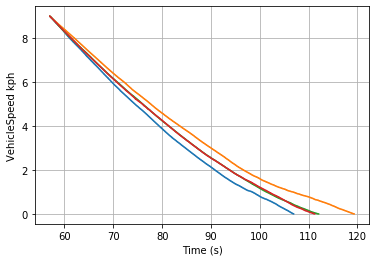

In [8]:
PlotDeclSpdOverlay(Pzz_df['Time'],Pzz_df['VelForward'],Pzz_zeroPoints)

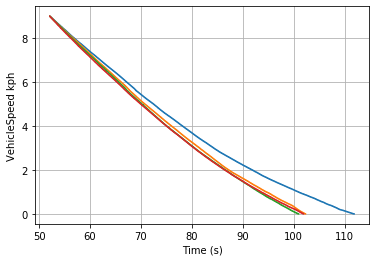

In [9]:
PlotDeclSpdOverlay(Xtp_df['Time'],Xtp_df['VelForward'],Xtp_zeroPoints)

# Filtering Signals

In [10]:
Xtp_Ts = np.mean(np.diff(Xtp_df['Time']))
Pzz_Ts = np.mean(np.diff(Pzz_df['Time']))

print('The sampling frequency for the recorded data in both cars are: Pzz with %d Hz and Xtp with %d Hz'
      %(round(1/Pzz_Ts),round(1/Xtp_Ts)))

The sampling frequency for the recorded data in both cars are: Pzz with 100 Hz and Xtp with 100 Hz


In [11]:
# Frequency tuning
filt_ord = 2        # 2nd order filter
half_pwr_freq = 0.1 # half power frequency

Xtp_sos = butter(filt_ord, half_pwr_freq, 'low', fs=1/Xtp_Ts, output='sos')
Pzz_sos = butter(filt_ord, half_pwr_freq, 'low', fs=1/Pzz_Ts, output='sos')

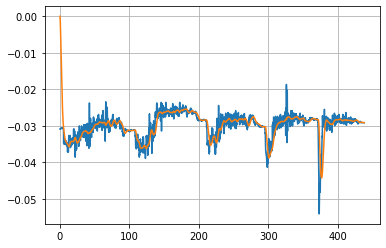

In [12]:
plt.plot(Xtp_df['Time'],Xtp_df['IsoPitchAngle'])
IsoPitchAngle_filt = sosfilt(Xtp_sos, Xtp_df['IsoPitchAngle'])
plt.plot(Xtp_df['Time'],IsoPitchAngle_filt)
plt.grid()
plt.show()

In [13]:
IsoPitchAngle_filt = sosfilt(Xtp_sos, Xtp_df['IsoPitchAngle'])
IsoRollAngle_filt = sosfilt(Xtp_sos, Xtp_df['IsoRollAngle'])
IsoYawAngle_filt = sosfilt(Xtp_sos, Xtp_df['IsoYawAngle'])

Xtp_df['IsoPitchAngle_filt'] = IsoPitchAngle_filt
Xtp_df['IsoRollAngle_filt']  = IsoRollAngle_filt
Xtp_df['IsoYawAngle_filt']   = IsoYawAngle_filt

In [14]:
IsoPitchAngle_filt = sosfilt(Pzz_sos, Pzz_df['IsoPitchAngle'])
IsoRollAngle_filt = sosfilt(Pzz_sos, Pzz_df['IsoRollAngle'])
IsoYawAngle_filt = sosfilt(Pzz_sos, Pzz_df['IsoYawAngle'])

Pzz_df['IsoPitchAngle_filt'] = IsoPitchAngle_filt
Pzz_df['IsoRollAngle_filt']  = IsoRollAngle_filt
Pzz_df['IsoYawAngle_filt']   = IsoYawAngle_filt

In [15]:
type(IsoPitchAngle_filt)

numpy.ndarray

In [16]:
Xtp_df.columns

Index(['Time', 'BrakePressure', 'BrakeSwitchStatus', 'DirectionIndication',
       'EngineSpeed', 'GearPosActual', 'GearPosTarget', 'LateralAcceleration',
       'PedalPos', 'PwrTrnTorqAct', 'RackPosition', 'ReversedGear',
       'SteeringWheelAngle', 'TCMPositionDisplay', 'TorsionBarTorque',
       'TorsionBarTorqueSign', 'VehMovementDirection', 'VehicleSpeed',
       'YawRate', 'AD_AutonomousMode', 'AD_AxActivation_Req',
       'AD_ETSPosActActivation', 'AD_SteeringActivationReq', 'TransIPSpeed',
       'TransOPSpeed', 'AccelX', 'AccelY', 'AccelZ', 'AngAccelX', 'AngAccelY',
       'AngAccelZ', 'AngRateX', 'AngRateY', 'AngRateZ', 'AngleSlip',
       'AngleTrack', 'IsoPitchAngle', 'IsoRollAngle', 'IsoYawAngle', 'PosLat',
       'PosLon', 'RoadCurvature', 'VelForward', 'VelLateral', '',
       'IsoPitchAngle_filt', 'IsoRollAngle_filt', 'IsoYawAngle_filt'],
      dtype='object')

In [17]:
Xtp_Runs_dict,Xtp_VehFilt = BuildRunsDict(Xtp_df,Xtp_zeroPoints,Xtp_sos,Xtp_Ts)
Pzz_Runs_dict,Pzz_VehFilt = BuildRunsDict(Pzz_df,Pzz_zeroPoints,Pzz_sos,Pzz_Ts)

In [18]:
Xtp_Runs_dict.keys()

dict_keys(['VehSpd', 'VehAccFilt', 'VehAccRaw', 'VehPitchFilt', 'VehPitchRaw', 'VehRollFilt', 'VehRollRaw'])

In [19]:
Pzz_Runs_dict.keys()

dict_keys(['VehSpd', 'VehAccFilt', 'VehAccRaw', 'VehPitchFilt', 'VehPitchRaw', 'VehRollFilt', 'VehRollRaw'])

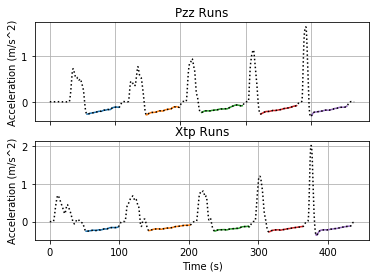

In [20]:
fig, axs = plt.subplots(2)

#plt.plot(Runs_dict['VehAccRaw']['Run1']['time'],Runs_dict['VehAccRaw']['Run1']['data'])
axs[0].plot(Pzz_Runs_dict['VehAccFilt']['Run1']['time'],Pzz_Runs_dict['VehAccFilt']['Run1']['data'])
axs[0].plot(Pzz_Runs_dict['VehAccFilt']['Run2']['time'],Pzz_Runs_dict['VehAccFilt']['Run2']['data'])
axs[0].plot(Pzz_Runs_dict['VehAccFilt']['Run3']['time'],Pzz_Runs_dict['VehAccFilt']['Run3']['data'])
axs[0].plot(Pzz_Runs_dict['VehAccFilt']['Run4']['time'],Pzz_Runs_dict['VehAccFilt']['Run4']['data'])
axs[0].plot(Pzz_Runs_dict['VehAccFilt']['Run5']['time'],Pzz_Runs_dict['VehAccFilt']['Run5']['data'])
accfilt = list(np.diff(Pzz_VehFilt)/Pzz_Ts)
accfilt.insert(0,accfilt[0])
axs[0].plot(Pzz_df['Time'],accfilt,color='k',linestyle=':')
#axs[0].xlabel('Time (s)')
#axs[0].ylabel('Acceleration (m/s^2)')
axs[0].set_title('Pzz Runs')
axs[0].grid()

#plt.plot(Runs_dict['VehAccRaw']['Run1']['time'],Runs_dict['VehAccRaw']['Run1']['data'])
axs[1].plot(Xtp_Runs_dict['VehAccFilt']['Run1']['time'],Xtp_Runs_dict['VehAccFilt']['Run1']['data'])
axs[1].plot(Xtp_Runs_dict['VehAccFilt']['Run2']['time'],Xtp_Runs_dict['VehAccFilt']['Run2']['data'])
axs[1].plot(Xtp_Runs_dict['VehAccFilt']['Run3']['time'],Xtp_Runs_dict['VehAccFilt']['Run3']['data'])
axs[1].plot(Xtp_Runs_dict['VehAccFilt']['Run4']['time'],Xtp_Runs_dict['VehAccFilt']['Run4']['data'])
axs[1].plot(Xtp_Runs_dict['VehAccFilt']['Run5']['time'],Xtp_Runs_dict['VehAccFilt']['Run5']['data'])
accfilt = list(np.diff(Xtp_VehFilt)/Xtp_Ts)
accfilt.insert(0,accfilt[0])
axs[1].plot(Xtp_df['Time'],accfilt,color='k',linestyle=':')
#axs[1].xlabel('Time (s)')
#axs[1].ylabel('Acceleration (m/s^2)')
axs[1].set_title('Xtp Runs')
axs[1].grid()

for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='Acceleration (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

In [21]:
#Xtp_Runs_dict['FgiRaw']  = {}
#Xtp_Runs_dict['FgiFilt'] = {}
Xtp_Runs_dict.keys()

dict_keys(['VehSpd', 'VehAccFilt', 'VehAccRaw', 'VehPitchFilt', 'VehPitchRaw', 'VehRollFilt', 'VehRollRaw'])

In [22]:
mass_pzz = 2761
mass_xtp = 2798
Xtp_Runs_dict = WorkOutFgi(mass_xtp,Xtp_Runs_dict)
Pzz_Runs_dict = WorkOutFgi(mass_pzz,Pzz_Runs_dict)
Xtp_Runs_dict.keys()

dict_keys(['VehSpd', 'VehAccFilt', 'VehAccRaw', 'VehPitchFilt', 'VehPitchRaw', 'VehRollFilt', 'VehRollRaw', 'FgiRaw', 'FgiFilt'])

In [23]:
np.diff(Xtp_Runs_dict['VehSpd']['Run1']['data'][0])

array([0., 0., 0., ..., 0., 0., 0.])

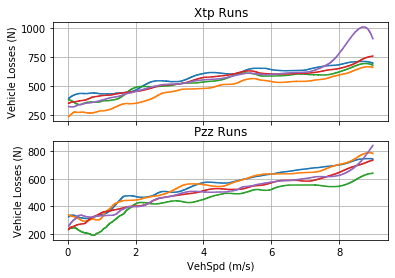

In [24]:
# Plot the vehicle losses
xtp_x = []
xtp_y = []

pzz_x = []
pzz_y = []

fig, axs = plt.subplots(2)

for i in range(5):
    spd = list(Xtp_Runs_dict['VehSpd'][('Run'+str(i+1))]['data'][0])
    fgifilt = Xtp_Runs_dict['FgiFilt'][('Run'+str(i+1))]['data']
    xtp_x.extend(spd)
    xtp_y.extend(fgifilt)
    axs[0].plot(spd,fgifilt)
    axs[0].set_title('Xtp Runs')
    axs[0].grid()
    
    spd = list(Pzz_Runs_dict['VehSpd'][('Run'+str(i+1))]['data'][0])
    fgifilt = Pzz_Runs_dict['FgiFilt'][('Run'+str(i+1))]['data']
    pzz_x.extend(spd)
    pzz_y.extend(fgifilt)
    
    axs[1].plot(spd,fgifilt)
    axs[1].set_title('Pzz Runs')
    axs[1].grid()
    
for ax in axs.flat:
    ax.set(xlabel='VehSpd (m/s)', ylabel='Vehicle Losses (N)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

In [25]:
xtp_coefficients = np.polyfit(xtp_x,xtp_y,1)
pzz_coefficients = np.polyfit(pzz_x,pzz_y,1)

In [26]:
max(xtp_y)

1007.0899267534259

In [27]:
xtp_xFit = np.linspace(min(xtp_x), max(xtp_x), 1000)
xtp_yFit = np.polyval(xtp_coefficients,xtp_xFit)
pzz_xFit = np.linspace(min(pzz_x), max(pzz_x), 1000)
pzz_yFit = np.polyval(pzz_coefficients,pzz_xFit)

In [28]:
xtp_coefficients

array([ 42.36491095, 346.27722463])

In [29]:
max(xtp_xFit)

9.0

In [30]:
max(xtp_yFit)

727.5614232096788

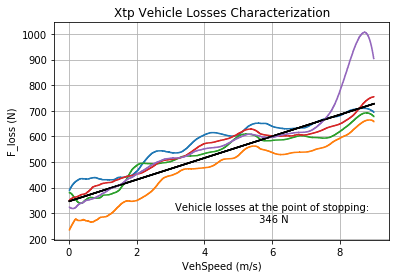

In [31]:
# Plot the vehicle losses
xtp_x = []
xtp_y = []

for i in range(5):
    spd = list(Xtp_Runs_dict['VehSpd'][('Run'+str(i+1))]['data'][0])
    fgifilt = Xtp_Runs_dict['FgiFilt'][('Run'+str(i+1))]['data']
    xtp_x.extend(spd)
    xtp_y.extend(fgifilt)
    plt.plot(spd,fgifilt)
    plt.plot(xtp_xFit,xtp_yFit,color='k')
    
    
plt.text(6, 300,('Vehicle losses at the point of stopping:\n %d N' %xtp_coefficients[1]),
     horizontalalignment='center',
     verticalalignment='center')#,
     #transform = ax.transAxes)
plt.title('Xtp Vehicle Losses Characterization')
plt.xlabel('VehSpeed (m/s)')
plt.ylabel('F_loss (N)')
plt.grid()
plt.show()

In [32]:
xtp_coefficients

array([ 42.36491095, 346.27722463])

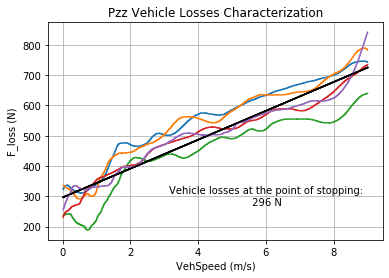

In [33]:
# Plot the vehicle losses
pzz_x = []
pzz_y = []

for i in range(5):
    spd = list(Pzz_Runs_dict['VehSpd'][('Run'+str(i+1))]['data'][0])
    fgifilt = Pzz_Runs_dict['FgiFilt'][('Run'+str(i+1))]['data']
    pzz_x.extend(spd)
    pzz_y.extend(fgifilt)
    plt.plot(spd,fgifilt)
    plt.plot(pzz_xFit,pzz_yFit,color='k')
    
plt.text(6, 300,('Vehicle losses at the point of stopping:\n %d N' %pzz_coefficients[1]),
     horizontalalignment='center',
     verticalalignment='center')#,
     #transform = ax.transAxes)
plt.title('Pzz Vehicle Losses Characterization')
plt.xlabel('VehSpeed (m/s)')
plt.ylabel('F_loss (N)')
plt.grid()    
plt.show()

In [34]:
pzz_coefficients

array([ 47.6758672 , 296.09792747])